# Mini Project 3

**2025 Introduction to Quantiative Methods in Finance**

**The Erdös Institute**

The code below provides a visual representation of how the Black-Scholes **call option** price changes with respect to time.

**a)** Use the visualization to interpret how the *rate of change* of the Black-Scholes call option price behaves as time progresses.

**b)** Create a separate graphic to visualize how the *rate of change* of the Black-Scholes call option price depends on the spot price $S(0)$.

**c)** Repeat parts **a** and **b** for **put option** prices.

**d)** Use the space below to record your observations and reflections based on the generated plots.

---

### Observations:

- *Call Option – Time Sensitivity:*  It seems that the call prices grow roughly like $O(\sqrt{n})$ with time at least initially. In the visualization below, I've plotted $11\sqrt{x}-2$ as the orange curve and it seems to match pretty well. If we extend the time horizon, then it starts to diverge. For example, if the time to expiry is 100 years into the future, they diverge but in practice, options don't have such long times to expiry. However, if we then use $11\ln(x)+5$, in the longer time frame, those are closer.

- *Call Option – Spot Price Sensitivity:*  As the spot price grows, the call price seems like it grows somewhat exponentially at first but then becomes linearly. For spot prices $[50,200]$, I've also plotted the line $y=x-110$ which seems to math very well.

- *Put Option – Time Sensitivity:* The put prices seem to be similar to the call prices, just shifted up by a constant.

- *Put Option – Spot Price Sensitivity:* The graph here seems to be a reflection of the spot-call graph across some vertical axis. I've plotted $y=110-x$ now and it fits pretty well for much of the graph. 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
import seaborn as sns
sns.set_style('darkgrid')

def bs_call(S0, K, sigma, t=1, r=0):
    """
    Description:
    
    Computes the Black-Scholes value of a European call option.
    
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate
    
    Returns:
        Call option price
    """
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    #d2 = (np.log(S0/K) + (r-.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return S0*norm.cdf(d1)-K*np.exp(-r*t)*norm.cdf(d2)


def bs_put(S0, K, sigma, t=1, r=0):
    """
    Description:
    
    Computes the Black-Scholes value of a European put option.
    
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate
    
    Returns:
        Put option price
    """
    
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    #d2 = (np.log(S0/K) + (r-.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return -S0*norm.cdf(-d1)+K*np.exp(-r*t)*norm.cdf(-d2)

<>:11: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\l'
<>:11: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\l'
/var/folders/_d/c5j2kkcx3jvfgg9tymcv58yr0000gn/T/ipykernel_67853/301490607.py:11: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(times, 11*np.sqrt(times)-2,label='$11\sqrt{x}-2$')
/var/folders/_d/c5j2kkcx3jvfgg9tymcv58yr0000gn/T/ipykernel_67853/301490607.py:12: SyntaxWarning: invalid escape sequence '\l'
  plt.plot(times,11*np.log(times)+5,label='$11\ln(x)+5$')


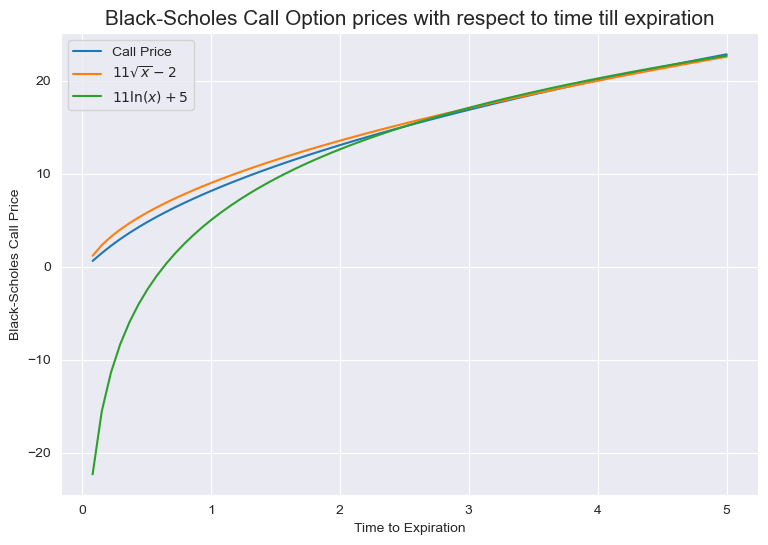

In [60]:
S0 = 100
K = 110
sigma = .3
times = np.linspace(1/12, 5, 70)

call_prices = [bs_call(S0,K,sigma, t = times[i]) for i in range(len(times))]

plt.figure(figsize = (9,6))
plt.title('Black-Scholes Call Option prices with respect to time till expiration', size = 15)
plt.plot(times, call_prices, label='Call Price')
plt.plot(times, 11*np.sqrt(times)-2,label='$11\sqrt{x}-2$')
plt.plot(times,11*np.log(times)+5,label='$11\ln(x)+5$')
plt.xlabel('Time to Expiration')
plt.ylabel('Black-Scholes Call Price')
plt.legend()
plt.show()

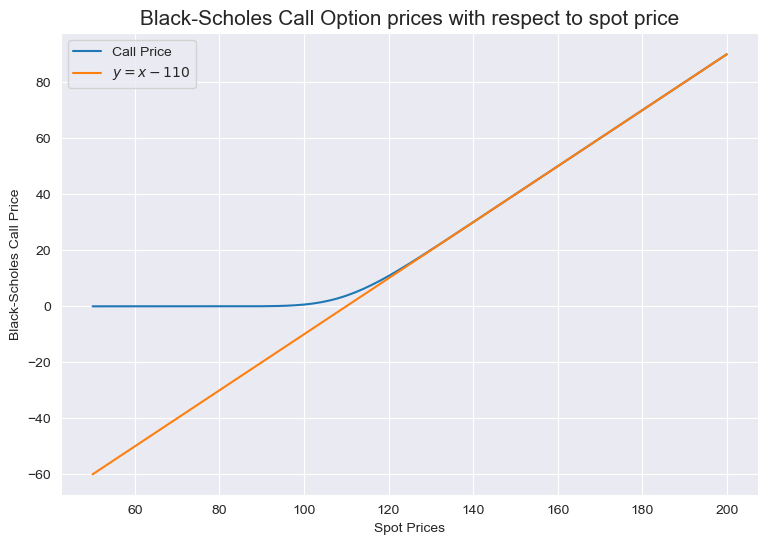

In [70]:
S0 = np.linspace(50,200,151) # increments of 50 cents
K = 110
sigma = .3
time = 1/12

call_prices = [bs_call(S,K,sigma, t = time) for S in S0]

plt.figure(figsize = (9,6))
plt.title('Black-Scholes Call Option prices with respect to spot price', size = 15)
plt.plot(S0, call_prices, label='Call Price')
plt.plot(S0, S0-110, label='$y=x-110$')
plt.xlabel('Spot Prices')
plt.ylabel('Black-Scholes Call Price')
plt.legend()
plt.show()

<>:11: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\l'
<>:11: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\l'
/var/folders/_d/c5j2kkcx3jvfgg9tymcv58yr0000gn/T/ipykernel_67853/2947940858.py:11: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(times, 11*np.sqrt(times)+8,label='$11\sqrt{x}+8$')
/var/folders/_d/c5j2kkcx3jvfgg9tymcv58yr0000gn/T/ipykernel_67853/2947940858.py:12: SyntaxWarning: invalid escape sequence '\l'
  plt.plot(times,11*np.log(times)+15,label='$11\ln(x)+15$')


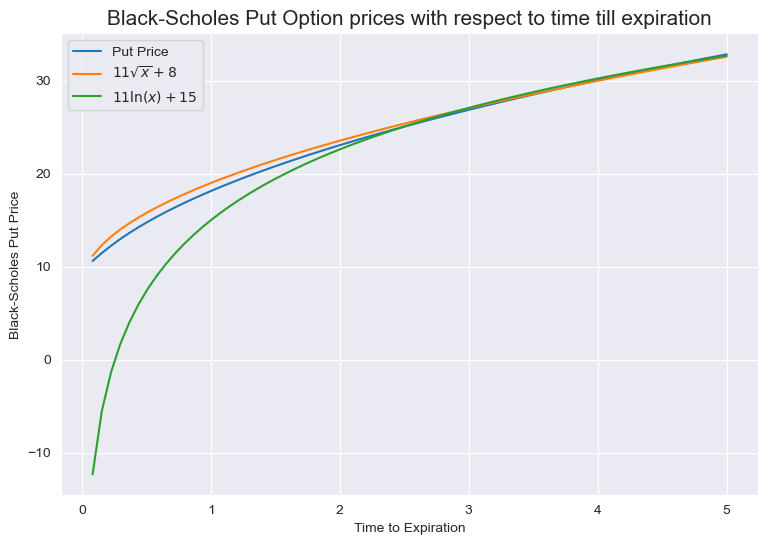

In [66]:
S0 = 100
K = 110
sigma = .3
times = np.linspace(1/12, 5, 70)

put_prices = [bs_put(S0,K,sigma, t = times[i]) for i in range(len(times))]

plt.figure(figsize = (9,6))
plt.title('Black-Scholes Put Option prices with respect to time till expiration', size = 15)
plt.plot(times, put_prices, label='Put Price')
plt.plot(times, 11*np.sqrt(times)+8,label='$11\sqrt{x}+8$')
plt.plot(times,11*np.log(times)+15,label='$11\ln(x)+15$')
plt.xlabel('Time to Expiration')
plt.ylabel('Black-Scholes Put Price')
plt.legend()
plt.show()

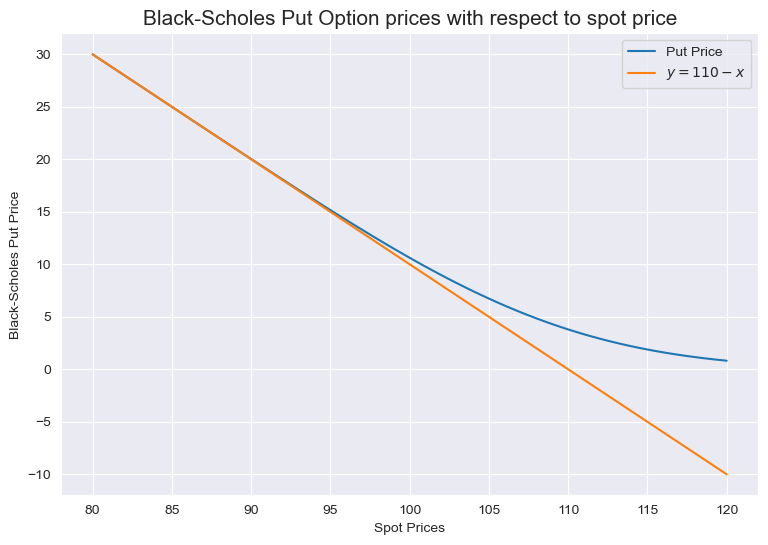

In [71]:
S0 = np.linspace(80,120,81) # increments of 50 cents
K = 110
sigma = .3
time = 1/12

put_prices = [bs_put(S,K,sigma, t = time) for S in S0]

plt.figure(figsize = (9,6))
plt.title('Black-Scholes Put Option prices with respect to spot price', size = 15)
plt.plot(S0, put_prices, label='Put Price')
plt.plot(S0, 110-S0, label='$y=110-x$')
plt.xlabel('Spot Prices')
plt.ylabel('Black-Scholes Put Price')
plt.legend()
plt.show()